Importing

In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
from torchvision.datasets import Flowers102
import random
import numpy as np
import pandas as pd
import tarfile

from torchvision.datasets.folder import default_loader
from torchvision.datasets.utils import download_url

root = '../data/flowers102/'
img_filename = '102flowers.tgz'
labels_filename = 'imagelabels.mat'


Download and extract Flowers102

In [4]:

image_url = 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz'
labels_url = 'https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
download_url(image_url, root, img_filename)

with tarfile.open(os.path.join(root, img_filename), "r:gz") as tar:
    tar.extractall(path=root)

download_url(labels_url, root, labels_filename)

100%|██████████| 344862509/344862509 [00:15<00:00, 22897928.80it/s]


100%|██████████| 502/502 [00:00<00:00, 485819.25it/s]


Load files and labels

In [5]:
imagepath = os.path.join(root,'jpg')
dataset_length = len(os.listdir(imagepath))

files = [] 
for i in range(dataset_length):
    index = str(i+1).zfill(5)
    filename = 'image_'+ index + '.jpg'
    files.append(filename)

labels = scipy.io.loadmat(os.path.join(root,labels_filename))
labels = labels['labels'][0].tolist()

View class distributions

(array([45., 21., 15.,  8.,  4.,  3.,  2.,  2.,  0.,  2.]),
 array([ 40. ,  61.8,  83.6, 105.4, 127.2, 149. , 170.8, 192.6, 214.4,
        236.2, 258. ]),
 <BarContainer object of 10 artists>)

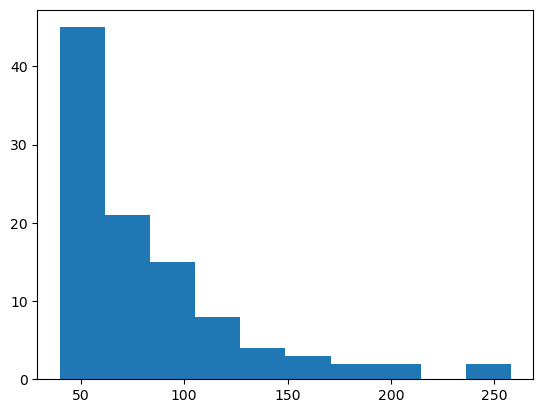

In [6]:
class_distribution = dict()
for i in labels:
    if i in class_distribution:
        class_distribution[i] += 1
    else:
        class_distribution[i] = 1

num_classes = len(class_distribution.keys())
plt.hist(class_distribution.values())

Making data list

In [7]:
data = []
for file, label in zip(files, labels):
    data.append([file,label])

In [8]:
class_distribution

{77: 251,
 73: 194,
 88: 154,
 89: 184,
 81: 166,
 46: 196,
 74: 171,
 51: 258,
 44: 93,
 82: 112,
 83: 131,
 78: 137,
 80: 105,
 75: 120,
 41: 127,
 43: 130,
 76: 107,
 84: 86,
 58: 114,
 56: 109,
 86: 58,
 60: 109,
 92: 66,
 11: 87,
 65: 102,
 8: 85,
 23: 91,
 30: 85,
 72: 96,
 53: 93,
 37: 108,
 17: 85,
 12: 87,
 29: 78,
 52: 85,
 18: 82,
 36: 75,
 90: 82,
 71: 78,
 40: 67,
 48: 71,
 55: 71,
 85: 63,
 91: 76,
 20: 56,
 47: 67,
 59: 67,
 2: 60,
 5: 65,
 28: 66,
 70: 62,
 22: 59,
 54: 61,
 87: 63,
 66: 61,
 32: 45,
 4: 56,
 42: 59,
 13: 49,
 38: 56,
 63: 54,
 68: 54,
 69: 54,
 93: 46,
 14: 48,
 64: 52,
 19: 49,
 49: 49,
 61: 50,
 50: 92,
 15: 49,
 9: 46,
 33: 46,
 26: 41,
 25: 41,
 3: 40,
 16: 41,
 79: 41,
 1: 40,
 21: 40,
 24: 42,
 27: 40,
 31: 52,
 34: 40,
 35: 43,
 39: 41,
 67: 42,
 10: 45,
 45: 40,
 6: 45,
 7: 40,
 57: 67,
 62: 55,
 94: 162,
 95: 128,
 96: 91,
 97: 66,
 98: 82,
 99: 63,
 100: 49,
 101: 58,
 102: 48}

Making in-out split

In [9]:
out_number = 20 #10 classes out-of-set

out_classes = list(range(num_classes-out_number+1,num_classes+1))

test_unknown = []
in_set = []

for X, y in data:
    if y in out_classes:
        test_unknown.append([X,y])
    else: 
        in_set.append([X,y])


In [10]:
in_set

[['image_00001.jpg', 77],
 ['image_00002.jpg', 77],
 ['image_00003.jpg', 77],
 ['image_00004.jpg', 77],
 ['image_00005.jpg', 77],
 ['image_00006.jpg', 77],
 ['image_00007.jpg', 77],
 ['image_00008.jpg', 77],
 ['image_00009.jpg', 77],
 ['image_00010.jpg', 77],
 ['image_00011.jpg', 77],
 ['image_00012.jpg', 77],
 ['image_00013.jpg', 77],
 ['image_00014.jpg', 77],
 ['image_00015.jpg', 77],
 ['image_00016.jpg', 77],
 ['image_00017.jpg', 77],
 ['image_00018.jpg', 77],
 ['image_00019.jpg', 77],
 ['image_00020.jpg', 77],
 ['image_00021.jpg', 77],
 ['image_00022.jpg', 77],
 ['image_00023.jpg', 77],
 ['image_00024.jpg', 77],
 ['image_00025.jpg', 77],
 ['image_00026.jpg', 77],
 ['image_00027.jpg', 77],
 ['image_00028.jpg', 77],
 ['image_00029.jpg', 77],
 ['image_00030.jpg', 77],
 ['image_00031.jpg', 77],
 ['image_00032.jpg', 77],
 ['image_00033.jpg', 77],
 ['image_00034.jpg', 77],
 ['image_00035.jpg', 77],
 ['image_00036.jpg', 77],
 ['image_00037.jpg', 77],
 ['image_00038.jpg', 77],
 ['image_000

Making train/val/test split

In [11]:
split = [0.1, 0.1] # fractional size of val/test splits
random.shuffle(in_set)

val, test_known, train = (np.split(in_set, [int(split[0]*len(in_set)), int((split[0]+ split[1])*len(in_set))] ))

Export all as csv

In [12]:
np.savetxt(os.path.join(root,"train.csv"), 
           train,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"test_known.csv"), 
           test_known,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"test_unknown.csv"), 
           test_unknown,
           delimiter =", ", 
           fmt ='% s')

np.savetxt(os.path.join(root,"val.csv"), 
           val,
           delimiter =", ", 
           fmt ='% s')
